In [3]:
from sklearn import datasets
import numpy as np

iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target

print('Class lables:', np.unique(y))

Class lables: [0 1 2]


In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
X.shape

(150, 2)

In [6]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [9]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train) #To get mean and standard deviation of X_train
X_train_std=sc.transform(X_train) # z= (x- µ)/σ
X_test_std=sc.transform(X_test)


In [10]:
from sklearn.linear_model import Perceptron

ppn=Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [11]:
y_pred=ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test!=y_pred).sum())

Misclassified samples: 3


In [12]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

Accuracy: 0.93


In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y, classifier, test_idx=None, resolution = 0.02):
    #set marker generator and color map
    markers = ('s','x', 'o', '^', 'v')
    colors =('red', 'blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max =X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max =X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap =cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class sample
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha = 0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        

    # highlight test samples
    if test_idx:
        X_test, y_test =X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:,0],
                    X_test[:,1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker ='o',
                    s=100,
                    label='test set')

In [14]:
import matplotlib.pyplot as plt
# vertical stack X_train_std over X_test_std
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                     classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


### Logistic regression intution and conditional probabilitys

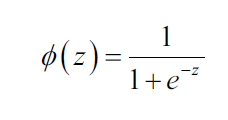

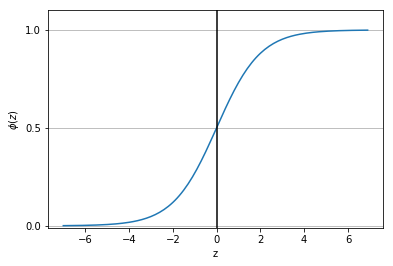

In [15]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

z=np.arange(-7,7, 0.1)
phi_z=sigmoid(z)

plt.plot(z,phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.01,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

plt.yticks([0.0,0.5,1.0])
ax= plt.gca()
ax.yaxis.grid(True)

plt.show()

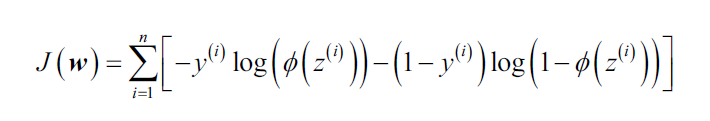

In [16]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X,y):
        rgen = np.random.RandomState(self.random_state) 
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 + X.shape[1])
        self.cost_= []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  +=self.eta * errors.sum()
            cost =-y.dot(np.log(output))-((1-y).dot(np.log(1-output))) # see above cost function definition
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self,z):
        return 1./(1.+ np.exp(-np.clip(z, -250,250)))
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    

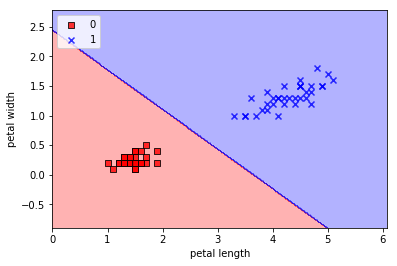

In [17]:
X_train_01_subset = X_train[(y_train==0 ) | (y_train==1)]
y_train_01_subset = y_train[(y_train==0 ) | (y_train==1)]

lrgd=LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

### Training a logistic regression model with scikit-learn

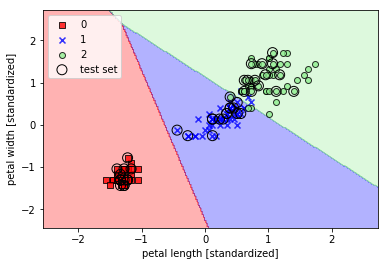

In [18]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=100.0, random_state =1)
lr.fit(X_train_std,y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


In [19]:
X_test_std.shape

(45, 2)

In [20]:
X_test_std[:3,:]

array([[ 0.89820289,  1.44465434],
       [-1.16537974, -1.04204575],
       [-1.33269725, -1.17292471]])

In [21]:
lr.predict_proba(X_test_std[:3,:])

array([[3.20136878e-08, 1.46953648e-01, 8.53046320e-01],
       [8.34428069e-01, 1.65571931e-01, 4.57896429e-12],
       [8.49182775e-01, 1.50817225e-01, 4.65678779e-13]])

In [22]:
lr.predict_proba(X_test_std[:30,:]).sum(axis=1)
# adding columns for each row, the probabilty for every three flowers should be 1.

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0])

### Dealing with the nonlinearly separable case 

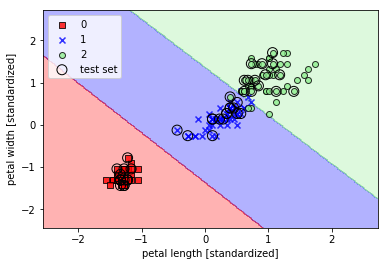

In [24]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std,y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


### Alternative implementation in scikit-learn

In [25]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron', n_iter=1000)
lr = SGDClassifier(loss='log', n_iter=1000)
svm = SGDClassifier(loss='hinge', n_iter=1000)

## Solving non-linear problems using a kernel M

In [26]:
np.logical_xor([True, True, False, False], [True, False, True, False])

array([False,  True,  True, False])

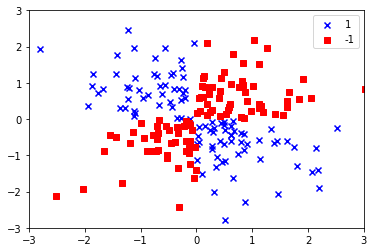

In [27]:
np.random.seed(1)

X_xor = np.random.randn(200,2)
y_xor= np.logical_xor(X_xor[:,0] > 0,
                      X_xor[:,1] > 0)

y_xor = np.where(y_xor, 1,-1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')

plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1,1],
            c='r', marker='s',
            label='-1')

plt.xlim([-3,3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()


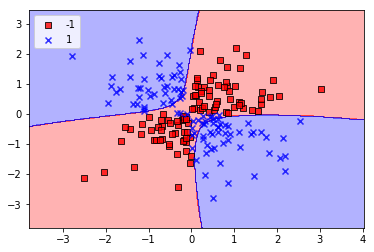

In [28]:
svm = SVC(kernel = 'rbf', random_state =1, gamma =0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc='upper left')
plt.show()

### Using rbf kernel

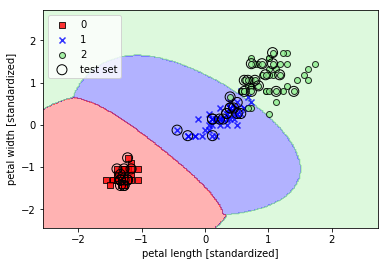

In [29]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, random_state=1)
svm.fit(X_train_std,y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()